In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=100,centers=3,n_features=2,random_state=23)

In [ ]:
##in the above 3 are centers and features are 2 here X is independent feature and y is dependent feature and in this y we will not take we ignore it because in unsupervised learning we will not take dependent features.

In [5]:
X

array([[-1.49211009e+00,  8.00048345e+00],
       [-2.15904392e-02,  7.80179239e+00],
       [ 5.37460126e+00, -3.12765245e+00],
       [-4.38451150e+00,  3.32409481e+00],
       [-3.88850604e+00,  4.54507091e+00],
       [ 3.59379934e-01,  9.87519697e+00],
       [-5.58283415e+00,  3.99641097e+00],
       [ 4.53959614e+00, -4.15996344e+00],
       [-5.81801602e+00,  3.18704223e+00],
       [ 4.48625651e+00, -5.95019223e+00],
       [ 5.53570693e+00, -4.11818513e+00],
       [-2.16027264e+00,  9.08621257e+00],
       [ 5.13015959e+00, -3.34102429e+00],
       [-6.12073151e+00,  4.51823547e+00],
       [-6.91264687e+00,  4.22049944e+00],
       [-1.36601802e-01,  1.01838626e+01],
       [ 4.51383197e+00, -5.36361832e+00],
       [-5.00614298e+00,  3.07150408e+00],
       [ 1.84611290e-01,  1.01316564e+01],
       [ 5.44061149e+00, -2.74884901e+00],
       [ 8.84119643e-01,  9.75137075e+00],
       [ 3.58594213e+00, -3.89082392e+00],
       [-5.38923704e+00,  3.49237594e+00],
       [ 4.

In [7]:
X.shape

(100, 2)

In [ ]:
##in the above 2 is the number of features and the 100 is the datapoints

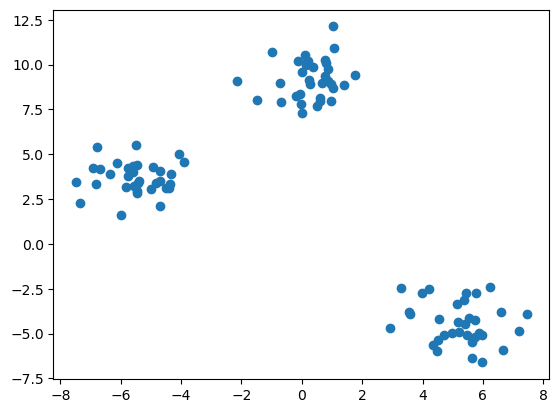

In [10]:
plt.scatter(X[:,0],X[:,1])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
from sklearn.cluster import KMeans

In [13]:
##Elbow method



In [21]:
wcss=[]
for k in range(1,11):
     kmeans=KMeans(n_clusters=k,init='k-means++')
     kmeans.fit(X_train)
     wcss.append(kmeans.inertia_)   

C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [22]:
wcss

[3605.1367590848267,
 832.431390612043,
 124.19935535709938,
 102.39292895313855,
 83.52342530171627,
 67.7416462743364,
 58.37631205828389,
 49.88330699136166,
 43.341197543095035,
 39.04288165840875]

In [23]:
#plot elbow curve

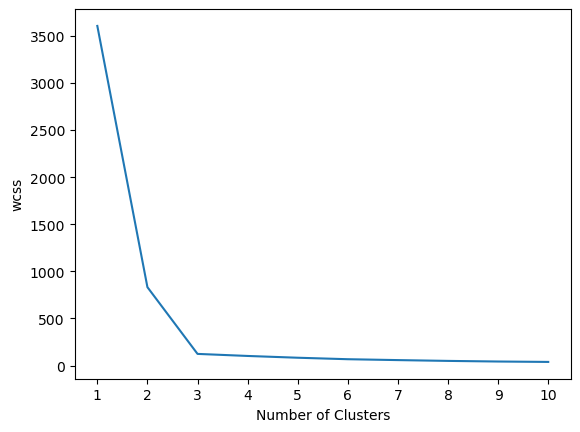

In [26]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [27]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [28]:
kmeans

KMeans(n_clusters=3)

In [34]:
y_labels=kmeans.fit_predict(X_train)

C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
y_label=kmeans.predict(X_test)

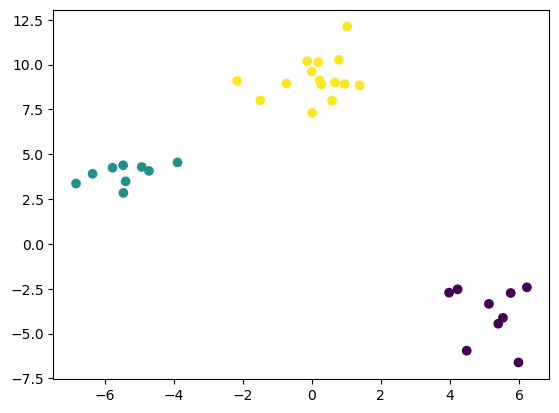

In [47]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_label)

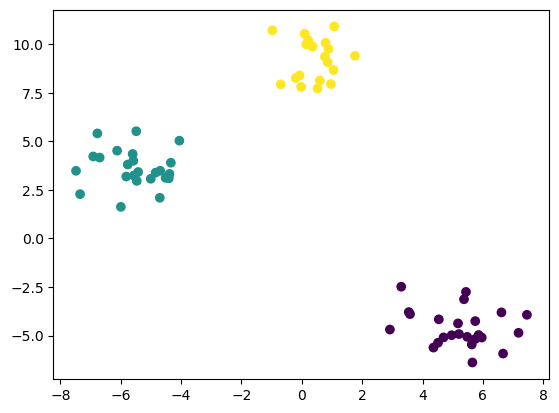

In [48]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [49]:
##knee locator

In [50]:
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [51]:
from kneed import KneeLocator

In [53]:
 k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
 k1.elbow

3

In [54]:
##for the performance metrices we use silhoutee score
from sklearn.metrics import silhouette_score

In [55]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\madar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [57]:
silhouette_coefficients

[0.7221825607415234,
 0.8182367206056518,
 0.6582003777751838,
 0.5114356365197967,
 0.38770769604174316,
 0.4040294150246945,
 0.40595758300843476,
 0.3959813919982897,
 0.3972321948204624]

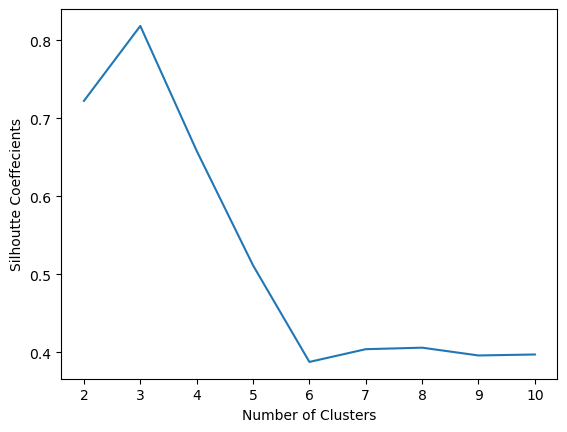

In [58]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeffecients")
plt.show()